In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("Portugal 2022-08-01 to 2023-08-01.csv")

In [3]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [4]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Portugal,2022-08-01,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,...,19.3,9,10,2022-08-01T06:37:52,2022-08-01T20:47:33,0.13,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08532099999,08534099999,D7126,0853..."
1,Portugal,2022-08-02,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,...,14.5,9,10,2022-08-02T06:38:44,2022-08-02T20:46:32,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
2,Portugal,2022-08-03,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,...,7.2,3,10,2022-08-03T06:39:37,2022-08-03T20:45:29,0.20,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
3,Portugal,2022-08-04,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,...,7.1,3,10,2022-08-04T06:40:30,2022-08-04T20:44:25,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
4,Portugal,2022-08-05,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,...,8.9,4,10,2022-08-05T06:41:23,2022-08-05T20:43:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."


In [5]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,22.170219,14.040164,17.633333,22.124044,13.771038,17.509290,12.212295,73.609016,1.358077,29.781421,...,22.940437,244.606831,1017.989891,41.038251,10.286612,183.312568,15.837705,6.581967,10.273224,0.474344
std,5.409258,4.440893,4.444690,5.342276,4.942833,4.673284,4.275984,14.262406,5.396396,45.792340,...,6.470541,110.121673,5.562460,22.861156,0.881662,90.978147,7.853592,2.406066,2.324779,0.286268
min,11.300000,2.600000,7.500000,11.300000,0.100000,5.300000,-1.400000,26.100000,0.000000,0.000000,...,7.400000,0.800000,998.400000,0.000000,3.800000,5.300000,0.500000,0.000000,10.000000,0.000000
25%,17.925000,11.000000,14.400000,17.925000,11.000000,14.400000,9.700000,65.875000,0.000000,0.000000,...,18.400000,209.875000,1014.700000,25.475000,10.200000,101.850000,8.800000,5.000000,10.000000,0.232500
50%,22.600000,15.000000,18.150000,22.600000,15.000000,18.150000,13.400000,72.900000,0.000000,0.000000,...,22.200000,279.100000,1017.600000,39.900000,10.500000,177.600000,15.300000,7.000000,10.000000,0.470000
75%,26.500000,17.675000,21.300000,26.375000,17.675000,21.300000,15.400000,84.475000,0.095000,100.000000,...,26.200000,331.450000,1021.350000,57.700000,10.500000,262.375000,22.775000,9.000000,10.000000,0.720000
max,36.100000,22.300000,28.000000,36.100000,22.300000,28.000000,19.900000,99.800000,60.570000,100.000000,...,45.000000,359.900000,1032.700000,91.100000,12.500000,354.000000,30.500000,10.000000,30.000000,0.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        148 non-null    object 
 14  snow              366 non-null    int64  
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

In [7]:
# ver se existem linhas duplicadas se sim apager se não não fazer nada
print ( df.duplicated().sum() ) # não existem duplicadas por isso não fazemos nada

0


In [8]:
# verificar que na coluna name apenas temos um nome ou seja podemos apagar esta coluna pois não trará nada de novo para o modelo
print ( df['name'].describe() )
df.drop(['name'], inplace = True, axis = 1) # apaga-mos a coluna 'name'
df.head() #verificamos que a coluna não existe mais


count          366
unique           1
top       Portugal
freq           366
Name: name, dtype: object


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2022-08-01,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,0.0,...,19.3,9,10,2022-08-01T06:37:52,2022-08-01T20:47:33,0.13,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08532099999,08534099999,D7126,0853..."
1,2022-08-02,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,0.0,...,14.5,9,10,2022-08-02T06:38:44,2022-08-02T20:46:32,0.16,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
2,2022-08-03,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,0.0,...,7.2,3,10,2022-08-03T06:39:37,2022-08-03T20:45:29,0.20,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
3,2022-08-04,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,0.0,...,7.1,3,10,2022-08-04T06:40:30,2022-08-04T20:44:25,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."
4,2022-08-05,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,0.0,...,8.9,4,10,2022-08-05T06:41:23,2022-08-05T20:43:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08535099999,08532099999,08534099999,D7126,0853..."


<Axes: >

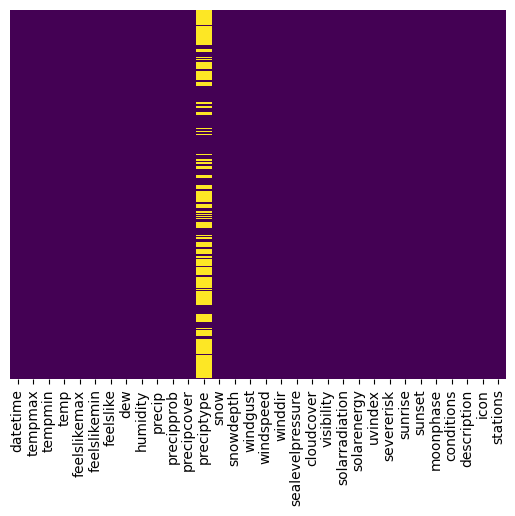

In [9]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [10]:
# analisar a coluna preciptype e tentar chegar a uma decisão em o que fazer
print(df['preciptype'])
print('\n')
print ( df['preciptype'].describe() )
print('\n')
print ( df['preciptype'].value_counts() )

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
361     NaN
362     NaN
363     NaN
364     NaN
365    rain
Name: preciptype, Length: 366, dtype: object


count      148
unique       1
top       rain
freq       148
Name: preciptype, dtype: object


preciptype
rain    148
Name: count, dtype: int64


In [11]:
# Decidimos como temos muitas entradas em branco que devemos apagar a coluna

df.drop(['preciptype'], inplace = True, axis = 1) # apaga-mos a coluna 'preciptype'

<Axes: >

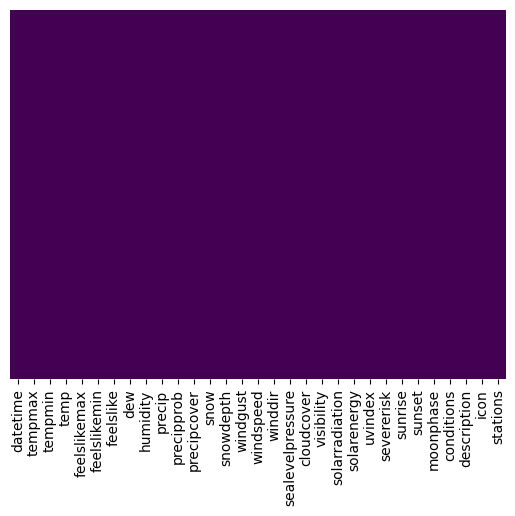

In [12]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [13]:
df.drop(['datetime'], inplace = True, axis = 1) # apaga-mos a coluna 'datetime' pois já temos essa informação
print (df.info()) #verificarmos que o datetime foi eliminado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [14]:
df['sunrise'] = pd.to_datetime(df['sunrise'])

# Criando colunas para dia, mês, ano, hora de o sol se levantar, minuto de o sol se levantar, segundo de o sol se levantar
df['Year']   = df['sunrise'].dt.year
df['Day']    = df['sunrise'].dt.day
df['Month']  = df['sunrise'].dt.month

df['hour_rise']   = df['sunrise'].dt.hour
df['minute_rise'] = df['sunrise'].dt.minute
df['second_rise'] = df['sunrise'].dt.second

df.drop(['sunrise'], inplace = True, axis = 1) # apaga-mos a coluna 'sunrise' pois já temos essa informação

print (df.info()) #verificarmos que o sunrise foi eliminado



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [15]:
df['sunset'] = pd.to_datetime(df['sunset'])

# Criando colunas para dia, mês, ano, hora de o sol se levantar, minuto de o sol se levantar, segundo de o sol se levantar
df['hour_set']   = df['sunset'].dt.hour
df['minute_set'] = df['sunset'].dt.minute
df['second_set'] = df['sunset'].dt.second

df.drop(['sunset'], inplace = True, axis = 1) # apaga-mos a coluna 'sunset' pois já temos essa informação

print (df.info()) #verificarmos que o sunset foi eliminado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           366 non-null    float64
 1   tempmin           366 non-null    float64
 2   temp              366 non-null    float64
 3   feelslikemax      366 non-null    float64
 4   feelslikemin      366 non-null    float64
 5   feelslike         366 non-null    float64
 6   dew               366 non-null    float64
 7   humidity          366 non-null    float64
 8   precip            366 non-null    float64
 9   precipprob        366 non-null    int64  
 10  precipcover       366 non-null    float64
 11  snow              366 non-null    int64  
 12  snowdepth         366 non-null    int64  
 13  windgust          366 non-null    float64
 14  windspeed         366 non-null    float64
 15  winddir           366 non-null    float64
 16  sealevelpressure  366 non-null    float64
 1

In [16]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,stations,Year,Day,Month,hour_rise,minute_rise,second_rise,hour_set,minute_set,second_set
0,30.4,19.9,25.6,30.6,19.9,25.7,15.6,55.1,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,1,8,6,37,52,20,47,33
1,31.0,17.7,22.6,31.4,17.7,22.7,16.9,71.9,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,2,8,6,38,44,20,46,32
2,28.0,19.0,22.3,28.6,19.0,22.4,16.9,72.7,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,3,8,6,39,37,20,45,29
3,25.3,19.2,21.1,25.3,19.2,21.1,17.1,78.5,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,4,8,6,40,30,20,44,25
4,26.8,18.6,21.3,27.4,18.6,21.4,17.0,77.7,0.0,0,...,"08535099999,08532099999,08534099999,D7126,0853...",2022,5,8,6,41,23,20,43,20


Vamos tratar dos restantes atributos object:
 
conditions, 
description, 
icon, 
stations, 

In [17]:
# analise do atributo conditions e transformação nele em números
print ( df['conditions'].describe() )
print('\n')
print ( df['conditions'].value_counts() )
print('\n')
print(df['conditions'])

# transformação em números
conditions_mapping = {"Partially cloudy": 1, "Rain, Partially cloudy": 2, "Clear": 3, "Rain, Overcast": 4, "Rain": 5}
df['conditions'] = df['conditions'].map(conditions_mapping)

df['conditions'] = df['conditions'].astype('category')

print ( df['conditions'].head() )

count                  366
unique                   5
top       Partially cloudy
freq                   192
Name: conditions, dtype: object


conditions
Partially cloudy          192
Rain, Partially cloudy    104
Clear                      65
Rain, Overcast              3
Rain                        2
Name: count, dtype: int64


0                       Clear
1            Partially cloudy
2            Partially cloudy
3            Partially cloudy
4            Partially cloudy
                ...          
361          Partially cloudy
362          Partially cloudy
363          Partially cloudy
364          Partially cloudy
365    Rain, Partially cloudy
Name: conditions, Length: 366, dtype: object
0    3
1    1
2    1
3    1
4    1
Name: conditions, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


Provavelmente vamos juntar as colunas conditions e description e fazer 6 novas colunas rain_morning, rain_afternoon, cloud_moring, cloud_afternoon,clear_moring, clear_afternoon

In [18]:
# analise do atributo conditions
print ( df['description'].describe() )
print('\n')
print ( df['description'].value_counts() )
print('\n')
print(df['description'])

# drop por agora numa versão futora trabalhamos sobre isto
df.drop(['description'], inplace = True, axis = 1)
print('\n')
df.info()

count                                   366
unique                                   19
top       Partly cloudy throughout the day.
freq                                    161
Name: description, dtype: object


description
Partly cloudy throughout the day.                                             161
Clear conditions throughout the day.                                           65
Partly cloudy throughout the day with morning rain.                            56
Clearing in the afternoon.                                                     23
Partly cloudy throughout the day with rain in the morning and afternoon.       19
Partly cloudy throughout the day with afternoon rain.                          13
Becoming cloudy in the afternoon.                                               8
Partly cloudy throughout the day with a chance of rain throughout the day.      4
Becoming cloudy in the afternoon with morning rain.                             3
Cloudy skies throughout the day with mo

 A coluna icon provavelmente seria para apagar quando as 6 novas colunas forem introduzidas

In [19]:
# analise do atributo ico

print ( df['icon'].describe() )
print('\n')
print ( df['icon'].value_counts() )
print('\n')
print(df['icon'])

# drop por agora numa versão futora trabalhamos sobre isto
conditions_mapping = {"partly-cloudy-day": 1, "rain": 2, "clear-day": 3}
df['icon'] = df['icon'].map(conditions_mapping)

df['icon'] = df['icon'].astype('category')

print ( df['icon'].head() )

count                   366
unique                    3
top       partly-cloudy-day
freq                    192
Name: icon, dtype: object


icon
partly-cloudy-day    192
rain                 109
clear-day             65
Name: count, dtype: int64


0              clear-day
1      partly-cloudy-day
2      partly-cloudy-day
3      partly-cloudy-day
4      partly-cloudy-day
             ...        
361    partly-cloudy-day
362    partly-cloudy-day
363    partly-cloudy-day
364    partly-cloudy-day
365                 rain
Name: icon, Length: 366, dtype: object
0    3
1    1
2    1
3    1
4    1
Name: icon, dtype: category
Categories (3, int64): [1, 2, 3]


In [20]:
# analise do atributo stations

print ( df['stations'].describe() )
print('\n')
print ( df['stations'].value_counts() )
print('\n')
print(df['stations'])

# Criar uma lista única de todas as estações
all_stations = set(','.join(df['stations']).split(','))

# Criar colunas binárias para cada estação
for station in all_stations:
    df[station] = df['stations'].apply(lambda x: int(station in x))

# Remover a coluna original 'stations'
df = df.drop('stations', axis=1)

print('\n')
df.info()

count                                                366
unique                                                 6
top       08532099999,08534099999,D7126,08536099999,LPPT
freq                                                 151
Name: stations, dtype: object


stations
08532099999,08534099999,D7126,08536099999,LPPT                151
08535099999,08532099999,08534099999,D7126,08536099999,LPPT     78
08534099999,D7126,08536099999,LPPT                             71
08535099999,08534099999,D7126,08536099999,LPPT                 29
08532099999,08534099999,08536099999,LPPT                       25
08534099999,08536099999,LPPT                                   12
Name: count, dtype: int64


0      08535099999,08532099999,08534099999,D7126,0853...
1      08535099999,08532099999,08534099999,D7126,0853...
2      08535099999,08532099999,08534099999,D7126,0853...
3      08535099999,08532099999,08534099999,D7126,0853...
4      08535099999,08532099999,08534099999,D7126,0853...
                      

In [21]:
df.nunique()

tempmax             145
tempmin             131
temp                152
feelslikemax        141
feelslikemin        140
feelslike           157
dew                 145
humidity            260
precip               86
precipprob            2
precipcover           6
snow                  1
snowdepth             1
windgust            103
windspeed           178
winddir             338
sealevelpressure    181
cloudcover          295
visibility           48
solarradiation      346
solarenergy         206
uvindex              11
severerisk            2
moonphase            93
conditions            5
icon                  3
Year                  2
Day                  31
Month                12
hour_rise             3
minute_rise          60
second_rise          60
hour_set              5
minute_set           60
second_set           60
08532099999           2
08535099999           2
08534099999           1
D7126                 2
08536099999           1
LPPT                  1
dtype: int64

In [22]:
# Nunca nevou logo esta coluna é unutil
print ( df['snow'].describe() )
print('\n')
print ( df['snow'].value_counts() )
df.drop(['snow'], inplace = True, axis = 1)
df.info()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: snow, dtype: float64


snow
0    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tempmax           366 non-null    float64 
 1   tempmin           366 non-null    float64 
 2   temp              366 non-null    float64 
 3   feelslikemax      366 non-null    float64 
 4   feelslikemin      366 non-null    float64 
 5   feelslike         366 non-null    float64 
 6   dew               366 non-null    float64 
 7   humidity          366 non-null    float64 
 8   precip            366 non-null    float64 
 9   precipprob        366 non-null    int64   
 10  precipcover       366 non-null    float64 
 11  snowdepth         366 non-null    int64   
 12  windgust          366 non-nul

In [23]:
# Nunca nevou logo esta coluna é unutil
print ( df['snowdepth'].describe() )
print('\n')
print ( df['snowdepth'].value_counts() )
df.drop(['snowdepth'], inplace = True, axis = 1)
df.info()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: snowdepth, dtype: float64


snowdepth
0    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tempmax           366 non-null    float64 
 1   tempmin           366 non-null    float64 
 2   temp              366 non-null    float64 
 3   feelslikemax      366 non-null    float64 
 4   feelslikemin      366 non-null    float64 
 5   feelslike         366 non-null    float64 
 6   dew               366 non-null    float64 
 7   humidity          366 non-null    float64 
 8   precip            366 non-null    float64 
 9   precipprob        366 non-null    int64   
 10  precipcover       366 non-null    float64 
 11  windgust          366 non-null    float64 
 12  windspeed         3

In [24]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['08534099999'].describe() )
print('\n')
print ( df['08534099999'].value_counts() )
df.drop(['08534099999'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 08534099999, dtype: float64


08534099999
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tempmax           366 non-null    float64 
 1   tempmin           366 non-null    float64 
 2   temp              366 non-null    float64 
 3   feelslikemax      366 non-null    float64 
 4   feelslikemin      366 non-null    float64 
 5   feelslike         366 non-null    float64 
 6   dew               366 non-null    float64 
 7   humidity          366 non-null    float64 
 8   precip            366 non-null    float64 
 9   precipprob        366 non-null    int64   
 10  precipcover       366 non-null    float64 
 11  windgust          366 non-null    float64 
 12  windspeed      

In [25]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['08536099999'].describe() )
print('\n')
print ( df['08536099999'].value_counts() )
df.drop(['08536099999'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 08536099999, dtype: float64


08536099999
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tempmax           366 non-null    float64 
 1   tempmin           366 non-null    float64 
 2   temp              366 non-null    float64 
 3   feelslikemax      366 non-null    float64 
 4   feelslikemin      366 non-null    float64 
 5   feelslike         366 non-null    float64 
 6   dew               366 non-null    float64 
 7   humidity          366 non-null    float64 
 8   precip            366 non-null    float64 
 9   precipprob        366 non-null    int64   
 10  precipcover       366 non-null    float64 
 11  windgust          366 non-null    float64 
 12  windspeed      

In [26]:
# Esta estação reguistou sempre os dados meteriológicos de todos os dias loga esta coluna é unutil 
print ( df['LPPT'].describe() )
print('\n')
print ( df['LPPT'].value_counts() )
df.drop(['LPPT'], inplace = True, axis = 1)
df.info()

count    366.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: LPPT, dtype: float64


LPPT
1    366
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tempmax           366 non-null    float64 
 1   tempmin           366 non-null    float64 
 2   temp              366 non-null    float64 
 3   feelslikemax      366 non-null    float64 
 4   feelslikemin      366 non-null    float64 
 5   feelslike         366 non-null    float64 
 6   dew               366 non-null    float64 
 7   humidity          366 non-null    float64 
 8   precip            366 non-null    float64 
 9   precipprob        366 non-null    int64   
 10  precipcover       366 non-null    float64 
 11  windgust          366 non-null    float64 
 12  windspeed         366 non-nul

<Axes: >

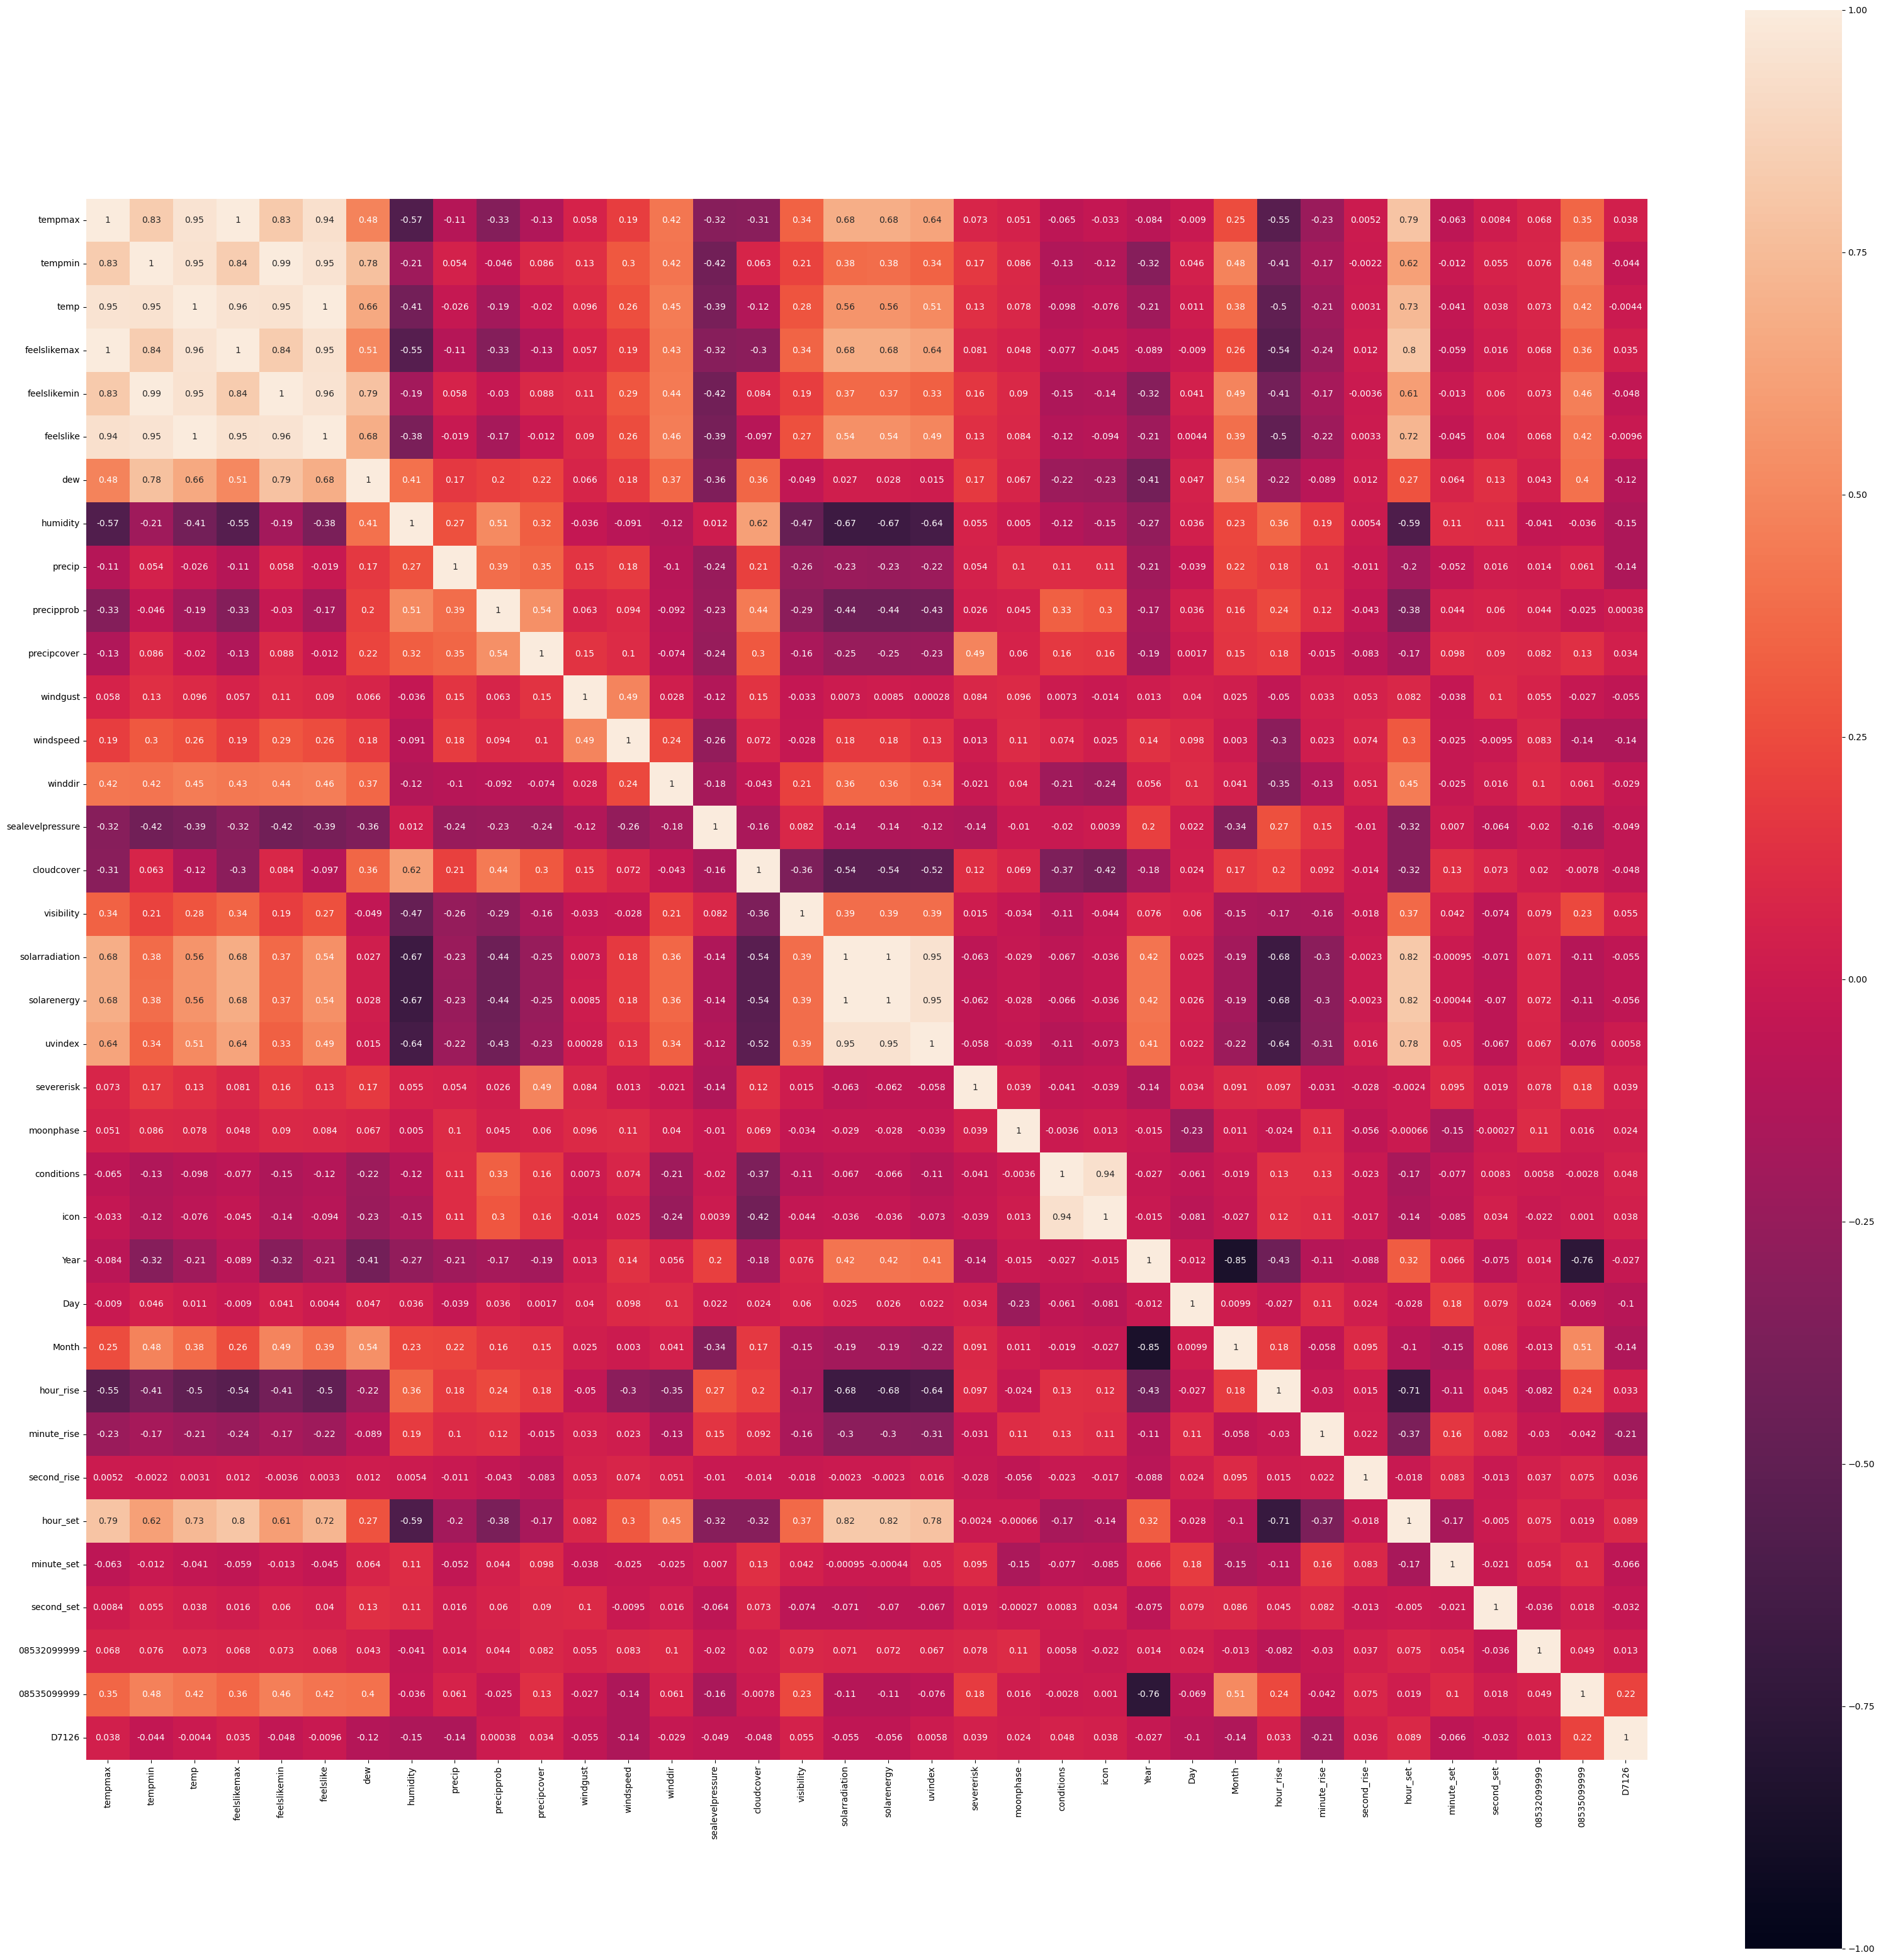

In [27]:
corr_matrix = df.corr()
f,ax =  plt.subplots(figsize = (40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True)